In [61]:
import numpy as np

In [62]:
x = np.linspace(0.0, 100, 500)
# lets say the slope of the line we want to fit is 3.5 and intercept is 20 and lets add a little noise to the data
y = 3.5*x + 20 + 0.1*np.random.normal(0,5,size=500)
# y = 3.5*x + 20

In [63]:
import matplotlib.pyplot as plt


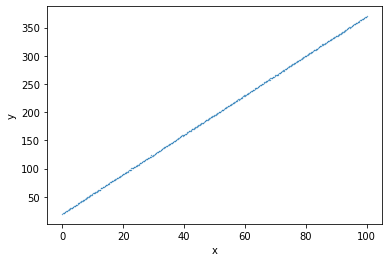

In [64]:
plt.scatter(x,y,s=0.1)
plt.ylabel('y')
plt.xlabel('x')
plt.show()

In [65]:
# Lets initialize the two parameters we would like to use for the optimization
theta0 = np.random.rand()
theta1 = np.random.rand()
print(theta0, theta1)

0.8542826077367859 0.24918851159629263


In [66]:
y_pred = theta0*x + theta1
J = np.mean((y_pred - y)**2)
print('MSE:',J)

MSE: 28955.149242586587


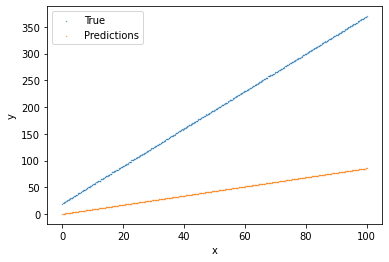

In [67]:
plt.scatter(x,y,s=0.1, label='True')
plt.scatter(x,y_pred,s=0.1, label='Predictions')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()
plt.show()

In [68]:
import torch

In [69]:
print(x.shape, x.dtype)
x = torch.tensor(x, requires_grad=True)
print(x.shape, x.dtype)
y_target = torch.tensor(y, requires_grad=True)
print(y.shape, y.dtype)
print(y_target.shape, y_target.dtype)

(500,) float64
torch.Size([500]) torch.float64
(500,) float64
torch.Size([500]) torch.float64


In [70]:
theta0 = torch.rand(1,requires_grad=True)
theta1 = torch.rand(1,requires_grad=True)
print(theta0.shape, theta1.shape)
print(theta0, theta1)

torch.Size([1]) torch.Size([1])
tensor([0.2046], requires_grad=True) tensor([0.2807], requires_grad=True)


In [71]:
x.grad, theta0.grad, theta1.grad

(None, None, None)

In [72]:
y_pred = theta0*x + theta1

In [75]:
J = torch.mean((y_pred - y_target)**2)

In [76]:
# computes gradients with respect variables
J.backward()

RuntimeError: ignored

In [77]:
theta0.grad, theta1.grad

(tensor([-23957.8320]), tensor([-737.8041]))

In [78]:
x.grad.shape

torch.Size([500])

In [79]:
# Batch gradient descent
lr = 1E-4
iters = 100000
losses = []
theta0 = torch.rand(1,requires_grad=True)
theta1 = torch.rand(1,requires_grad=True)
for i in range(iters):
    y_pred = theta0*x + theta1
    J = torch.mean((y_pred - y_target)**2)
    J.backward()
    # use torch.no_grad to prevent gradient accumulation
    with torch.no_grad():
        theta0 -= theta0.grad*lr
        theta1 -= theta1.grad*lr
    theta0.grad.zero_()
    theta1.grad.zero_()
    losses.append(J.item())

Text(0.5, 0, 'Iterations')

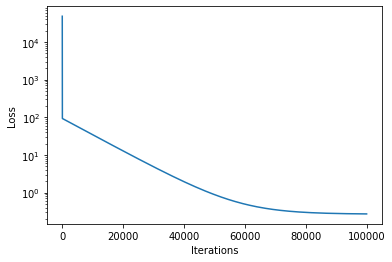

In [ ]:
plt.plot(np.arange(iters), losses)
plt.ylabel('Loss')
plt.yscale("log")
plt.xlabel('Iterations')

In [80]:
print(theta0, theta1)

tensor([3.5009], requires_grad=True) tensor([19.8794], requires_grad=True)


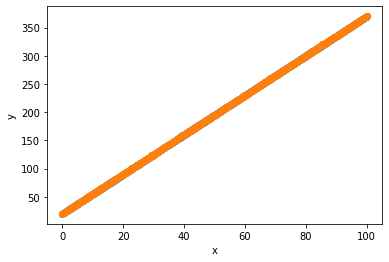

In [81]:
plt.scatter(x.detach().numpy(), y_pred.detach().numpy())
plt.scatter(x.detach().numpy(), y_target.detach().numpy())
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [ ]:
#What are some disadvantages of gradient descent?

# SGD

In [ ]:
lr = 1E-4
iters = 100000
losses = []
theta0 = torch.rand(1,requires_grad=True)
theta1 = torch.rand(1,requires_grad=True)
for i in range(iters):
    idx = np.random.choice(np.arange(x.shape[0]))
    y_pred = theta0*x[idx] + theta1
    J = torch.mean((y_pred - y_target[idx])**2)
    J.backward()
    with torch.no_grad():
        theta0 -= theta0.grad*lr
        theta1 -= theta1.grad*lr
    theta0.grad.zero_()
    theta1.grad.zero_()
    losses.append(J.item())

Text(0.5, 0, 'Iterations')

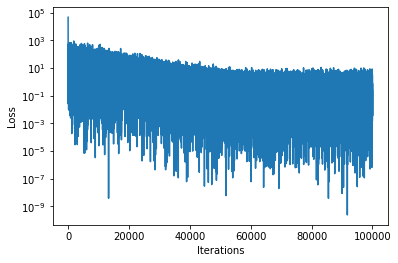

In [ ]:
plt.plot(np.arange(iters), losses)
plt.ylabel('Loss')
plt.yscale("log")
plt.xlabel('Iterations')

In [ ]:
# How do we improve upon SGD?

# mini-batch SGD

In [82]:
lr = 1E-4
iters = 100000
batch_size = 16
losses = []
theta0 = torch.rand(1,requires_grad=True)
theta1 = torch.rand(1,requires_grad=True)
for i in range(iters):
    idx = np.random.choice(np.arange(x.shape[0]), size=batch_size)
    y_pred = theta0*x[idx] + theta1
    J = torch.mean((y_pred - y_target[idx])**2)
    J.backward()
    with torch.no_grad():
        theta0 -= theta0.grad*lr
        theta1 -= theta1.grad*lr
    theta0.grad.zero_()
    theta1.grad.zero_()
    losses.append(J.item())

Text(0.5, 0, 'Iterations')

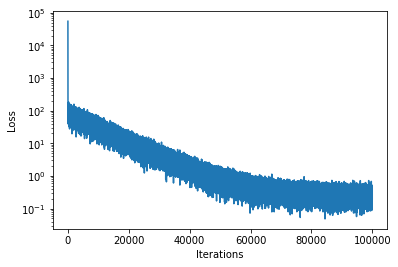

In [ ]:
plt.plot(np.arange(iters), losses)
plt.ylabel('Loss')
plt.yscale("log")
plt.xlabel('Iterations')

tensor([3.5004], requires_grad=True) tensor([19.7992], requires_grad=True)


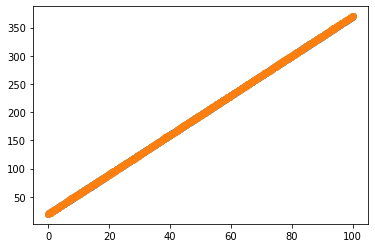

In [ ]:
y_pred = theta0*x + theta1
plt.scatter(x.detach().numpy(), y_pred.detach().numpy())
plt.scatter(x.detach().numpy(), y_target.detach().numpy())
print(theta0, theta1)

# Alternative approach

In [83]:
lr = 1E-4
epochs = 1000
batch_size = 16
losses = []
# we can make thetas torch parameters to scale to millions of parameters
theta0 = torch.nn.Parameter(torch.rand(1,requires_grad=True))
theta1 = torch.nn.Parameter(torch.rand(1,requires_grad=True))
weights = [theta0, theta1]
opt = torch.optim.SGD(weights, lr=lr)
idxs = np.arange(x.shape[0])
for i in range(epochs):
    np.random.shuffle(idxs)
    for samp_idx in range(0,x.shape[0],batch_size):
        if samp_idx + batch_size < x.shape[0]:
            idx = idxs[samp_idx:samp_idx+batch_size]
        else:
            idx = idxs[samp_idx:]
        opt.zero_grad()
        y_pred = theta0*x[idx] + theta1
        J = torch.mean((y_pred - y_target[idx])**2)
        J.backward()
        opt.step()
        losses.append(J.item())

Text(0.5, 0, 'Iterations')

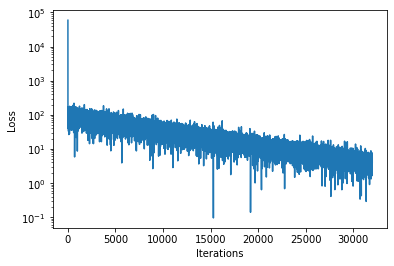

In [ ]:

plt.plot(np.arange(len(losses)), losses)
plt.ylabel('Loss')
plt.yscale("log")
plt.xlabel('Iterations')

#Add momentum

In [ ]:
lr = 1E-4
momentum = 0.9
iters = 100000
batch_size = 16
losses = []
theta0 = torch.nn.Parameter(torch.rand(1,requires_grad=True))
theta1 = torch.nn.Parameter(torch.rand(1,requires_grad=True))
weights = [theta0, theta1]
opt = torch.optim.SGD(weights, lr=lr, momentum=momentum)
for i in range(iters):
    idx = np.random.choice(np.arange(x.shape[0]), size=batch_size)
    opt.zero_grad()
    y_pred = theta0*x[idx] + theta1
    J = torch.mean((y_pred - y_target[idx])**2)
    J.backward()
    opt.step()
    losses.append(J.item())

Text(0.5, 0, 'Iterations')

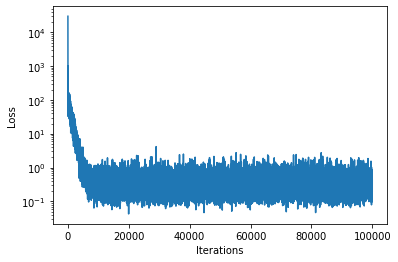

In [ ]:
plt.plot(np.arange(iters), losses)
plt.ylabel('Loss')
plt.yscale("log")
plt.xlabel('Iterations')

# Add learning rate scheduling

In [ ]:
lr = 1E-4
momentum = 0.9
iters = 100000
batch_size = 16
losses = []
theta0 = torch.nn.Parameter(torch.rand(1,requires_grad=True))
theta1 = torch.nn.Parameter(torch.rand(1,requires_grad=True))
weights = [theta0, theta1]
opt = torch.optim.SGD(weights, lr=lr, momentum=momentum)
sched = torch.optim.lr_scheduler.MultiStepLR(opt, [20000,30000], gamma=0.1, last_epoch=-1, verbose=False)
for i in range(iters):
    idx = np.random.choice(np.arange(x.shape[0]), size=batch_size)
    opt.zero_grad()
    y_pred = theta0*x[idx] + theta1
    J = torch.mean((y_pred - y_target[idx])**2)
    J.backward()
    opt.step()
    losses.append(J.item())
    sched.step()


Text(0.5, 0, 'Iterations')

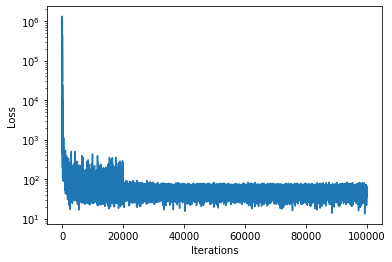

In [ ]:
plt.plot(np.arange(iters), losses)
plt.ylabel('Loss')
plt.yscale("log")
plt.xlabel('Iterations')

# Try different optimizers

In [ ]:
lr = 1E-3
iters = 100000
batch_size = 16
losses = []
theta0 = torch.nn.Parameter(torch.rand(1,requires_grad=True))
theta1 = torch.nn.Parameter(torch.rand(1,requires_grad=True))
weights = [theta0, theta1]
opt = torch.optim.Adam(weights, lr=lr)
#sched = torch.optim.lr_scheduler.MultiStepLR(opt, [20000,30000], gamma=0.1, last_epoch=-1, verbose=False)
for i in range(iters):
    idx = np.random.choice(np.arange(x.shape[0]), size=batch_size)
    opt.zero_grad()
    y_pred = theta0*x[idx] + theta1
    J = torch.mean((y_pred - y_target[idx])**2)
    J.backward()
    opt.step()
    losses.append(J.item())
    #sched.step()


Text(0.5, 0, 'Iterations')

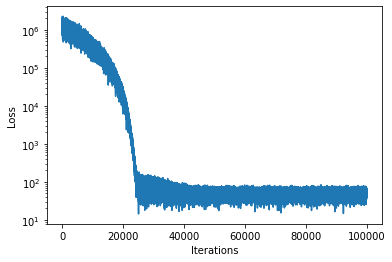

In [ ]:
plt.plot(np.arange(iters), losses)
plt.ylabel('Loss')
plt.yscale("log")
plt.xlabel('Iterations')

# Arbitrary Model Fitting

In [ ]:
x = np.linspace(0.0, 100, 500)
y = 10*np.sin(3.5*x) + 20*x + 32
x = torch.tensor(x, requires_grad=True)
y_target = torch.tensor(y, requires_grad=True)

lr = 1E-3
iters = 100000
batch_size = 16
losses = []
theta0 = torch.nn.Parameter(torch.rand(1,requires_grad=True))
theta1 = torch.nn.Parameter(torch.rand(1,requires_grad=True))
theta2 = torch.nn.Parameter(torch.rand(1,requires_grad=True))
theta3 = torch.nn.Parameter(torch.rand(1,requires_grad=True))
weights = [theta0, theta1, theta2, theta3]
opt = torch.optim.Adam(weights, lr=lr)
for i in range(iters):
    idx = np.random.choice(np.arange(x.shape[0]), size=batch_size)
    opt.zero_grad()
    y_pred = theta0*torch.sin(theta1*x[idx]) + theta2*x[idx] + theta3
    J = torch.mean((y_pred - y_target[idx])**2)
    J.backward()
    opt.step()
    losses.append(J.item())


Text(0.5, 0, 'Iterations')

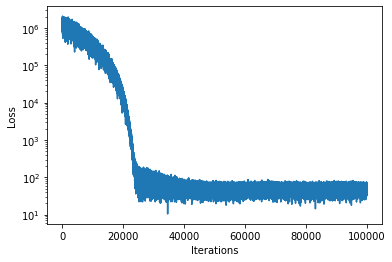

In [ ]:
plt.plot(np.arange(iters), losses)
plt.ylabel('Loss')
plt.yscale("log")
plt.xlabel('Iterations')

In [ ]:
print(theta0, theta1, theta2, theta3)

Parameter containing:
tensor([-0.0128], requires_grad=True) Parameter containing:
tensor([0.0108], requires_grad=True) Parameter containing:
tensor([19.9939], requires_grad=True) Parameter containing:
tensor([32.1025], requires_grad=True)


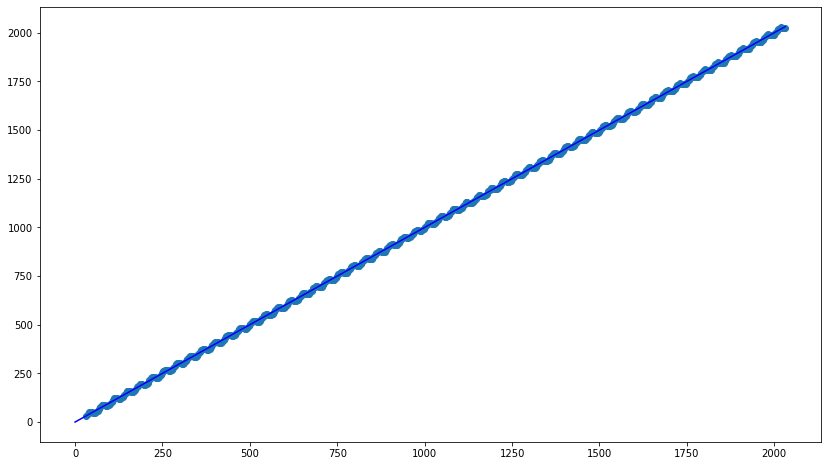

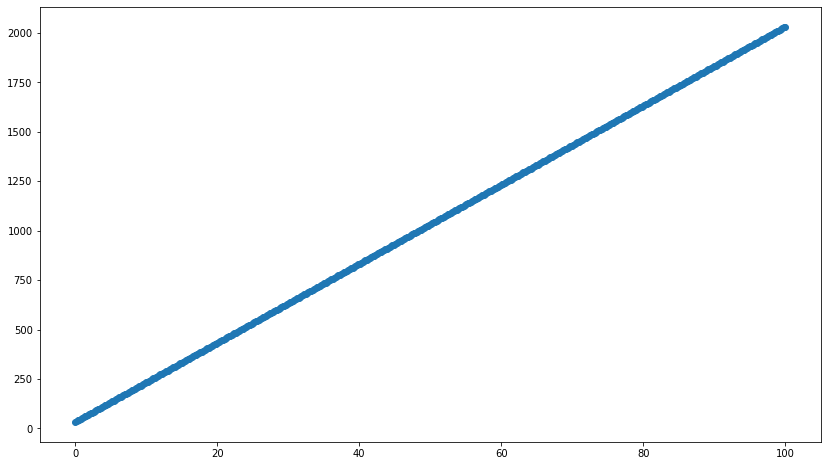

In [ ]:
with torch.no_grad():
    y_pred = theta0*torch.sin(theta1*x) + theta2*x + theta3
    plt.figure(figsize=(14,8))
    plt.scatter(y_pred, y_target)
    plt.plot(np.arange(max(y_pred)), np.arange(max(y_pred)), color='b')
    plt.figure(figsize=(14,8))
    plt.scatter(x, y_pred)

# Important docs for reference
1. https://pytorch.org/docs/stable/optim.html
2. https://ruder.io/optimizing-gradient-descent/
